# 按航空公司分類

**不同航空公司的長條圖**

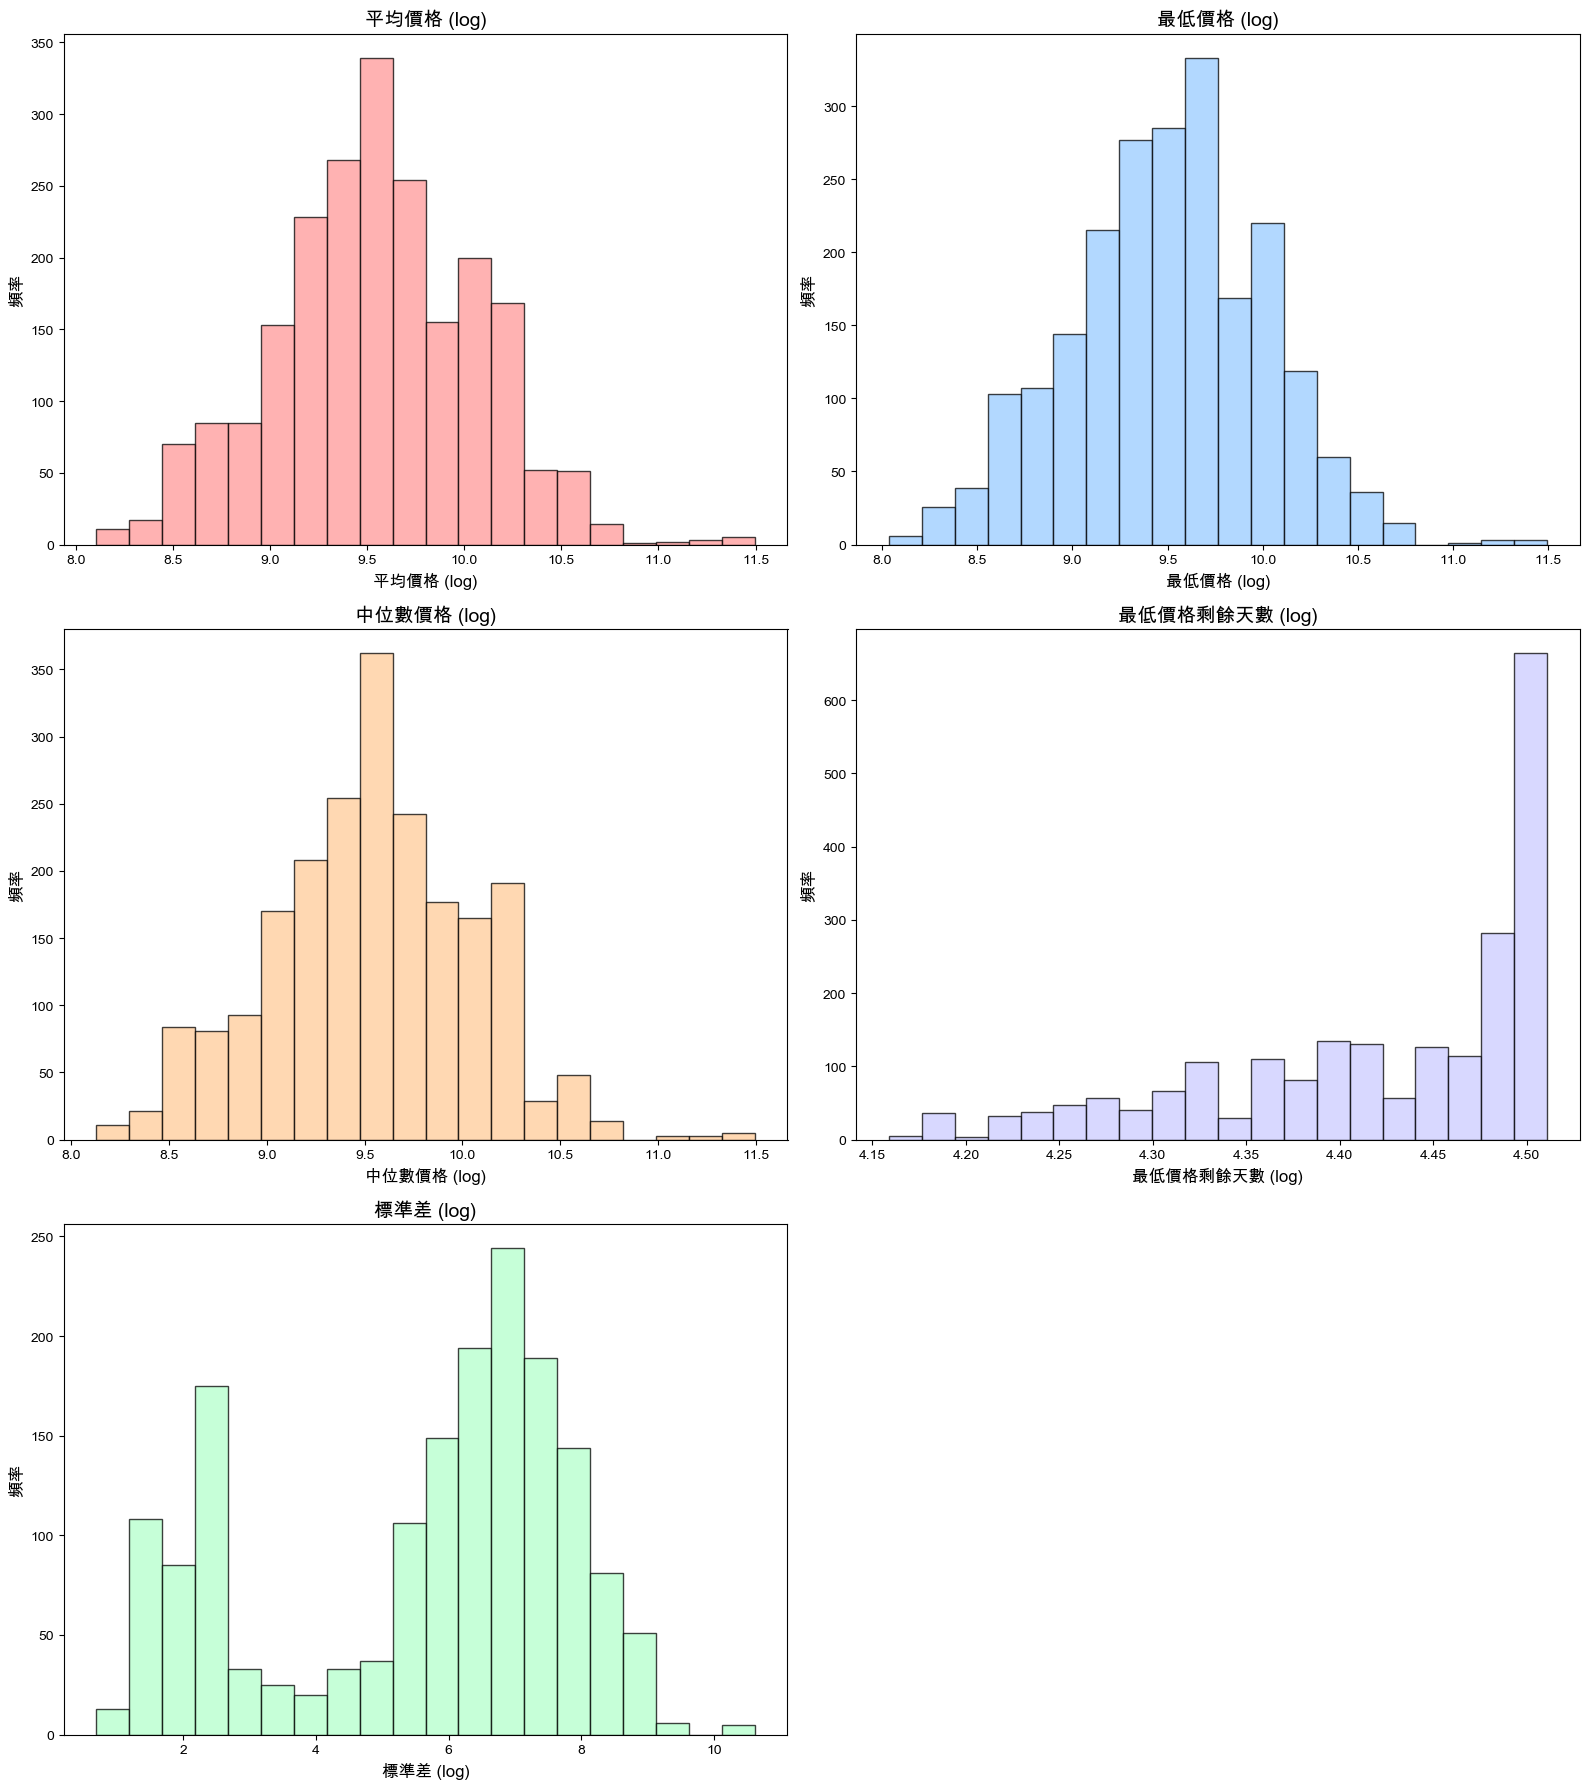

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 自定義顏色
custom_colors = ['#FF9999', '#99CCFF', '#FFCC99', '#CCCCFF', '#B3FFCC']

# 計算標準差
df['標準差'] = df.groupby(['出發日期', '航班代碼', '航空公司'])['平均價格'].transform('std')

# 對所有數據取對數
df['平均價格 (log)'] = np.log(df['平均價格'].replace(0, np.nan))
df['最低價格 (log)'] = np.log(df['最低價格'].replace(0, np.nan))
df['中位數價格 (log)'] = np.log(df['中位數價格'].replace(0, np.nan))
df['最低價格剩餘天數 (log)'] = np.log(df['最低價格剩餘天數'].replace(0, np.nan))
df['標準差 (log)'] = np.log(df['標準差'].replace(0, np.nan))

# 定義指標與標題
metrics = [
    '平均價格 (log)', 
    '最低價格 (log)', 
    '中位數價格 (log)', 
    '最低價格剩餘天數 (log)', 
    '標準差 (log)'
]
titles = ['平均價格 (log)', '最低價格 (log)', '中位數價格 (log)', '最低價格剩餘天數 (log)', '標準差 (log)']

# 繪製直方圖
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].hist(
        df[metric].dropna(),
        bins=20,  # 設定直方圖分箱數
        color=custom_colors[i % len(custom_colors)],
        alpha=0.75,
        edgecolor='black'
    )
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel(metric, fontsize=12)
    axes[i].set_ylabel('頻率', fontsize=12)

# 移除多餘的子圖框
if len(metrics) < len(axes):
    for ax in axes[len(metrics):]:
        ax.axis('off')

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司的箱型圖**

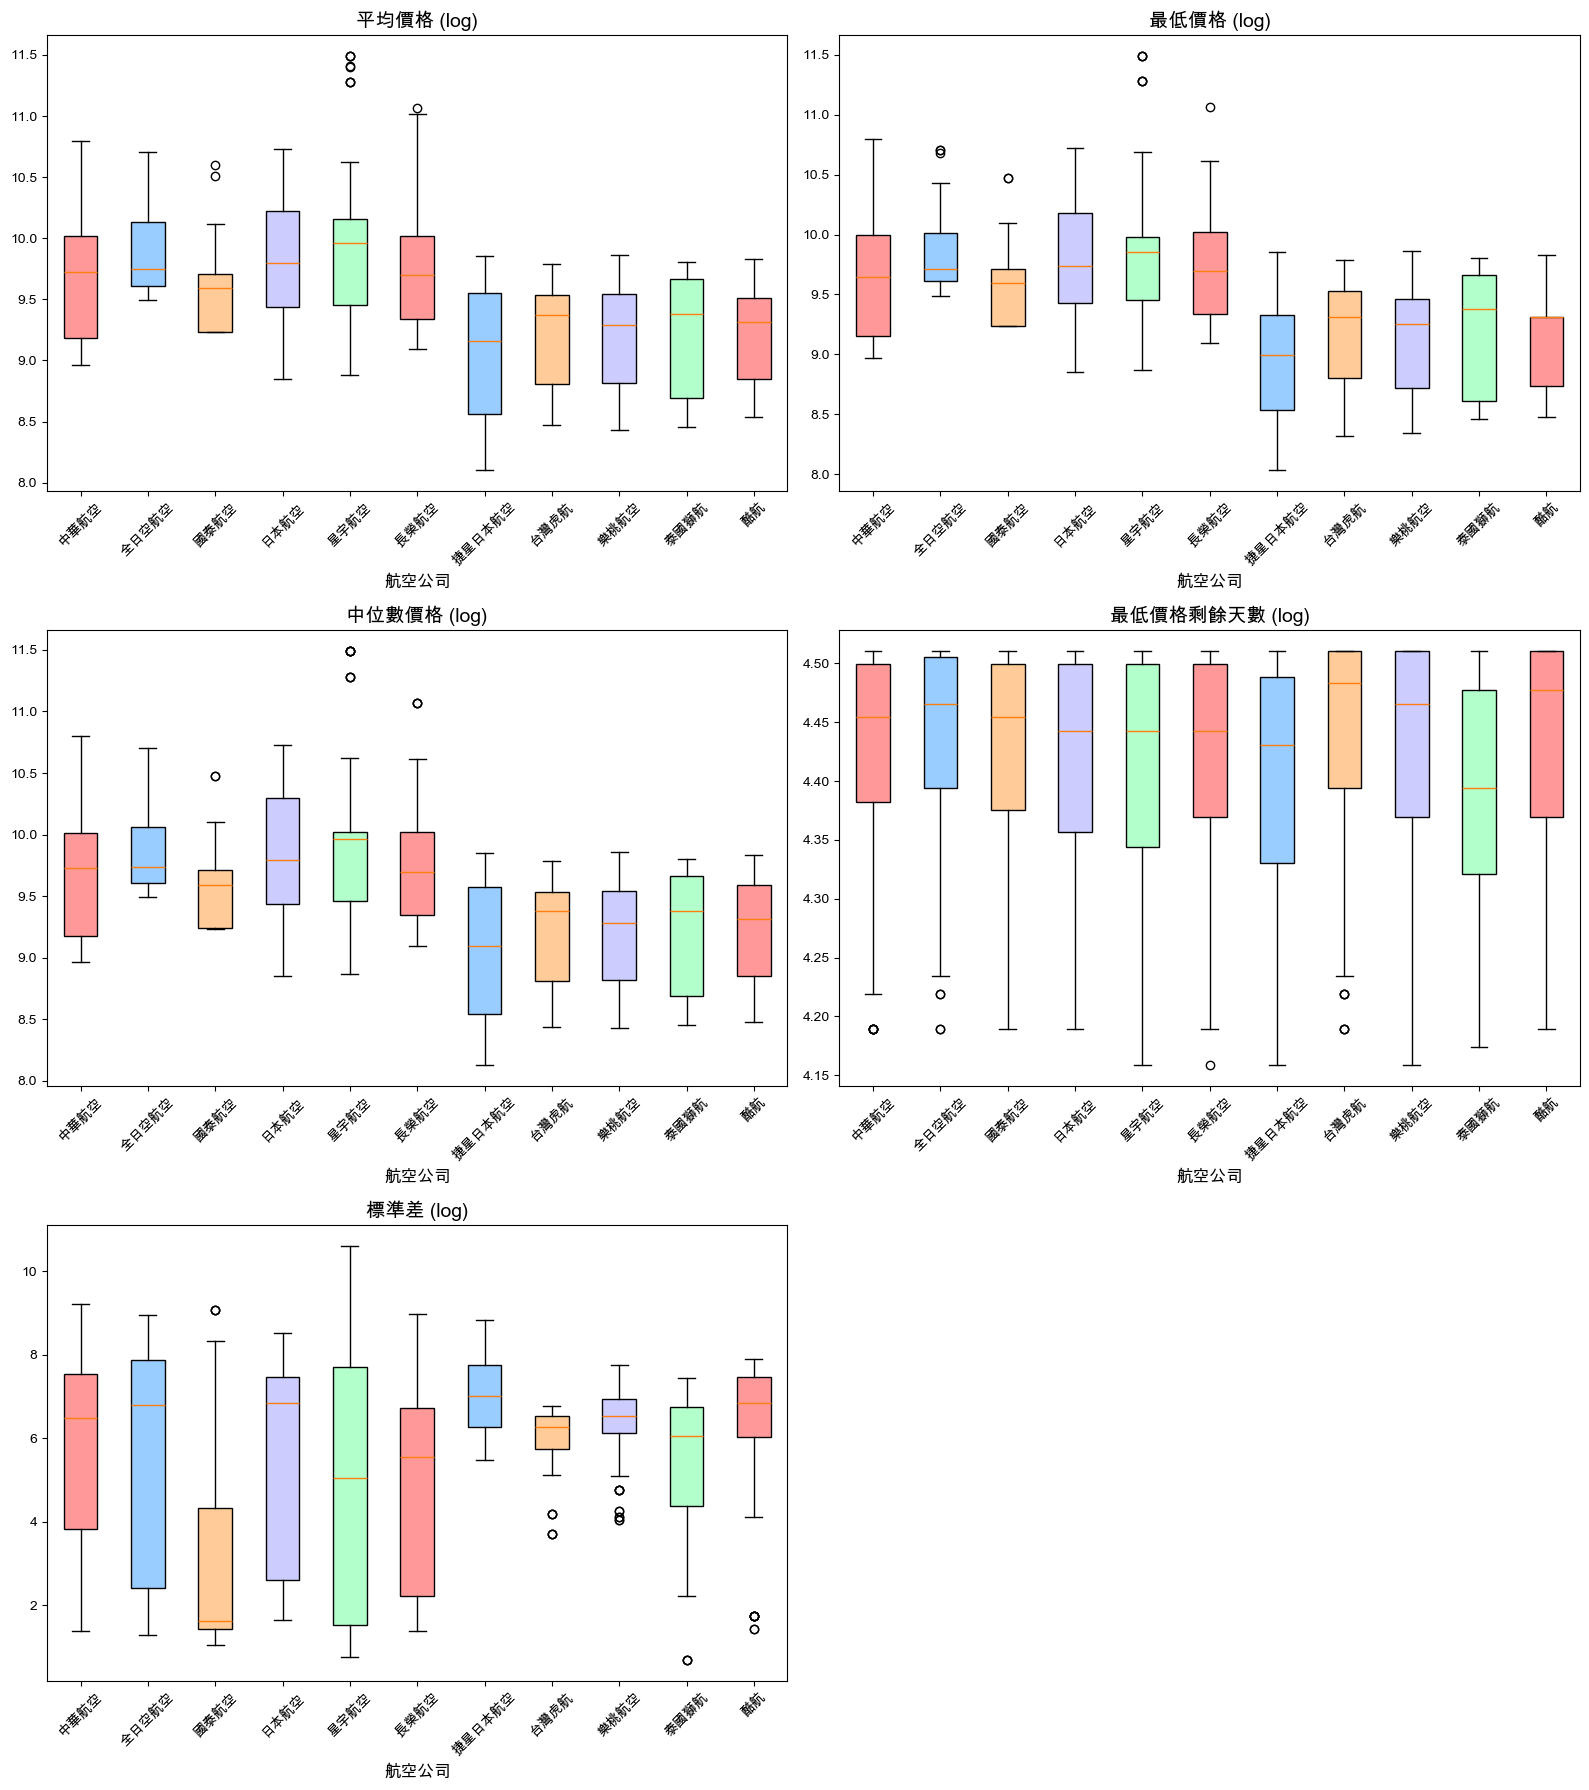

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 自定義顏色
custom_colors = ['#FF9999', '#99CCFF', '#FFCC99', '#CCCCFF', '#B3FFCC']

# 定義廉價航空
low_cost_airlines = ['捷星日本航空', '台灣虎航', '樂桃航空', '泰國獅航', '酷航']

# 排序航空公司，廉價航空放到最後
sorted_airlines = sorted([airline for airline in df['航空公司'].unique() if airline not in low_cost_airlines])
sorted_airlines += low_cost_airlines

# 計算標準差
df['標準差'] = df.groupby(['出發日期', '航班代碼', '航空公司'])['平均價格'].transform('std')

# 對所有數據取對數
df['平均價格 (log)'] = np.log(df['平均價格'].replace(0, np.nan))
df['最低價格 (log)'] = np.log(df['最低價格'].replace(0, np.nan))
df['中位數價格 (log)'] = np.log(df['中位數價格'].replace(0, np.nan))
df['最低價格剩餘天數 (log)'] = np.log(df['最低價格剩餘天數'].replace(0, np.nan))
df['標準差 (log)'] = np.log(df['標準差'].replace(0, np.nan))

# 繪製五個子圖
metrics = [
    '平均價格 (log)', 
    '最低價格 (log)', 
    '中位數價格 (log)', 
    '最低價格剩餘天數 (log)', 
    '標準差 (log)'
]
titles = ['平均價格 (log)', '最低價格 (log)', '中位數價格 (log)', '最低價格剩餘天數 (log)', '標準差 (log)']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    data = [df[df['航空公司'] == airline][metric].dropna() for airline in sorted_airlines]

    # 繪製箱型圖
    box = axes[i].boxplot(data, patch_artist=True, tick_labels=sorted_airlines)  # 使用 tick_labels 修正警告

    # 為每個箱型上色
    for patch, color in zip(box['boxes'], custom_colors * (len(sorted_airlines) // len(custom_colors) + 1)):
        patch.set_facecolor(color)

    # 設置標題與軸標籤
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel('航空公司', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# 移除多餘的子圖框
if len(metrics) < len(axes):
    for ax in axes[len(metrics):]:
        ax.axis('off')

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司平均價格跟最低價格的條形圖**

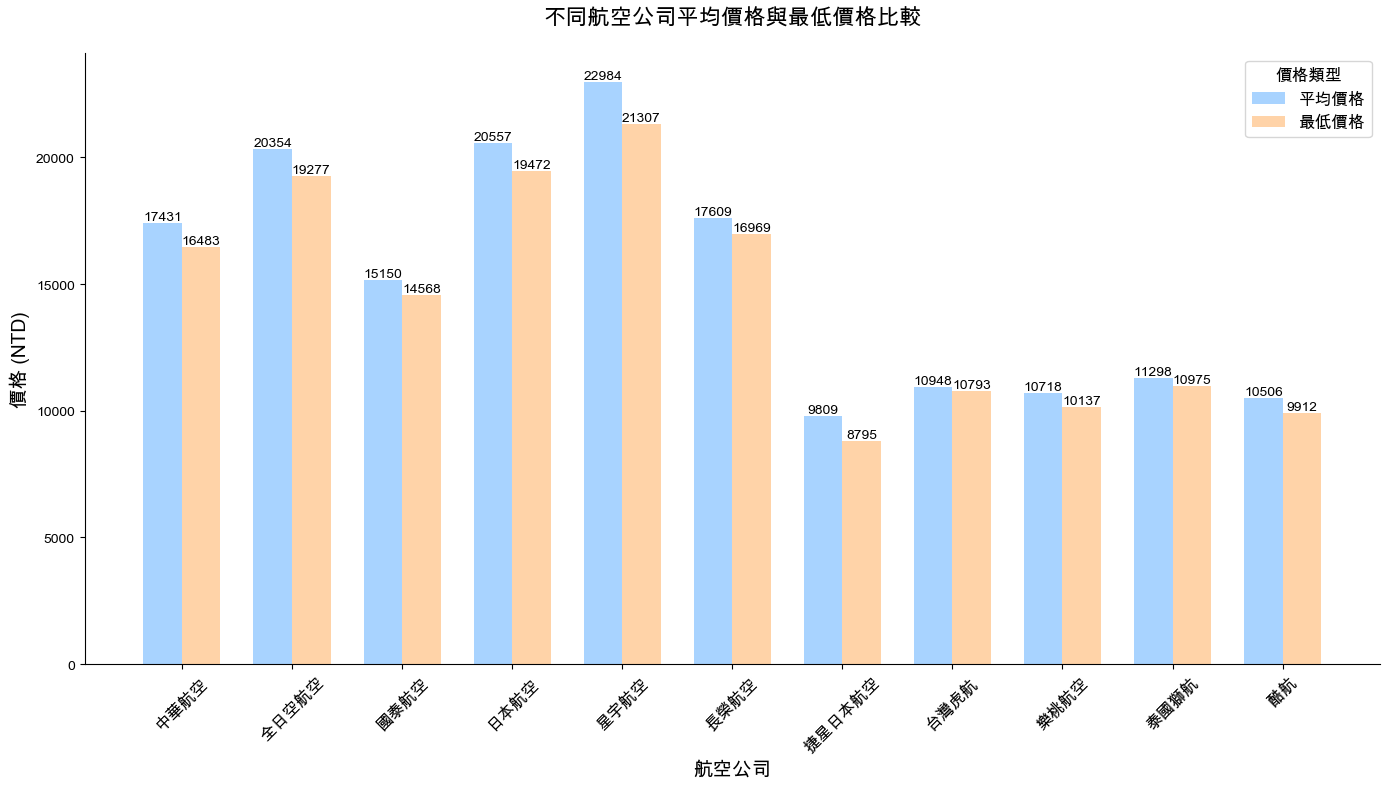

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 定義廉價航空，排序將廉價航空放到最後
low_cost_airlines = ['捷星日本航空', '台灣虎航', '樂桃航空', '泰國獅航', '酷航']
sorted_airlines = sorted([airline for airline in df['航空公司'].unique() if airline not in low_cost_airlines])
sorted_airlines += low_cost_airlines

# 按排序重新整理數據
df['航空公司'] = pd.Categorical(df['航空公司'], categories=sorted_airlines, ordered=True)
df = df.sort_values('航空公司')

# 聚合數據，保留每個航空公司的平均價格與最低價格
airline_stats = df.groupby('航空公司', observed=True).agg(  # 顯式指定 observed=True
    平均價格=('平均價格', 'mean'),
    最低價格=('最低價格', 'mean')
).reset_index()

# 條形圖位置
x = np.arange(len(airline_stats['航空公司']))  # x 軸位置
bar_width = 0.35  # 條形寬度

# 繪製條形圖
fig, ax = plt.subplots(figsize=(14, 8))
bar1 = ax.bar(x - bar_width / 2, airline_stats['平均價格'], bar_width, label='平均價格', color='#99CCFF', alpha=0.85)
bar2 = ax.bar(x + bar_width / 2, airline_stats['最低價格'], bar_width, label='最低價格', color='#FFCC99', alpha=0.85)

# 添加數值標籤
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, color='black')
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# 設置標題與軸標籤
ax.set_title('不同航空公司平均價格與最低價格比較', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('航空公司', fontsize=14)
ax.set_ylabel('價格 (NTD)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(airline_stats['航空公司'], rotation=45, fontsize=12)

# 圖例
ax.legend(fontsize=12, loc='upper right', title='價格類型', title_fontsize=12)

# 美化邊框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司的價格標準差**

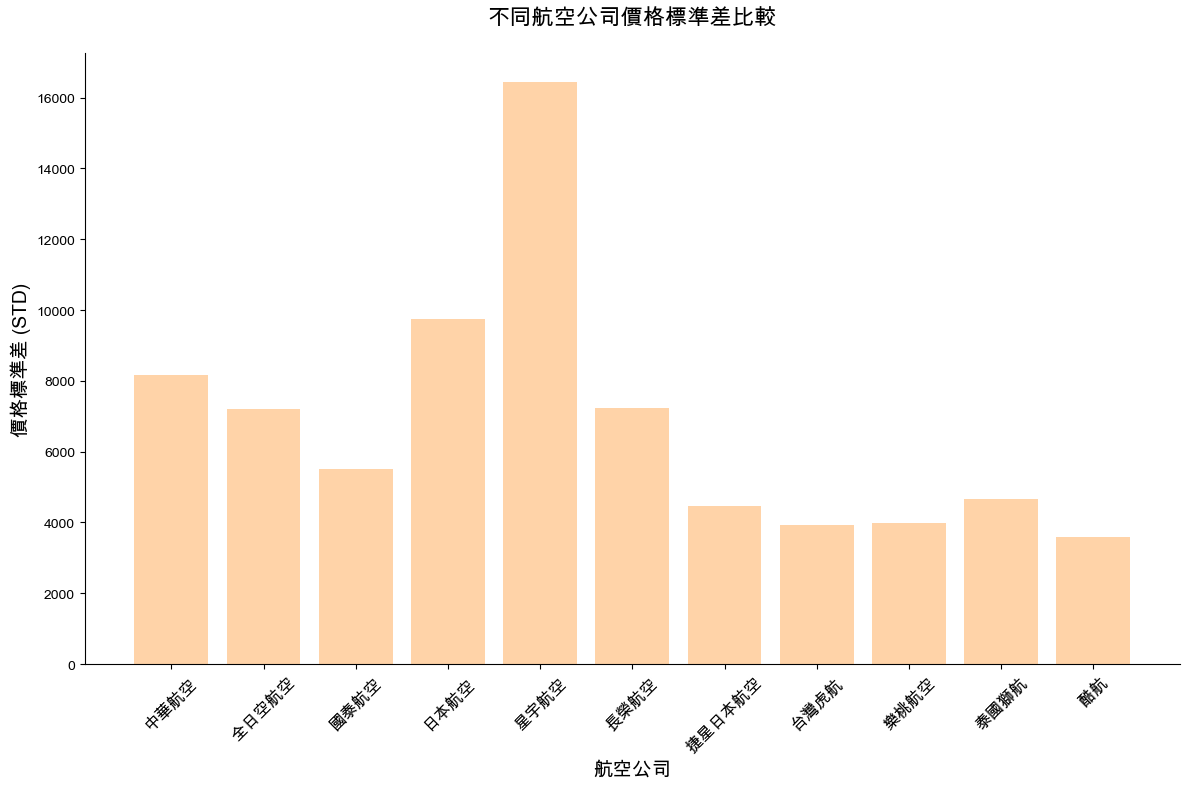

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 計算每個航空公司的價格標準差
airline_stats = df.groupby('航空公司').agg(
    標準差=('平均價格', 'std')
).reset_index()

# 定義廉價航空，排序將廉價航空放到最後
low_cost_airlines = ['捷星日本航空', '台灣虎航', '樂桃航空', '泰國獅航', '酷航']
sorted_airlines = sorted([airline for airline in airline_stats['航空公司'] if airline not in low_cost_airlines])
sorted_airlines += low_cost_airlines

# 按排序重組數據
airline_stats = airline_stats.set_index('航空公司').loc[sorted_airlines].reset_index()

# 繪製條形圖
plt.figure(figsize=(12, 8))
bars = plt.bar(airline_stats['航空公司'], airline_stats['標準差'], color='#FFCC99', alpha=0.85)

# 設置標題與軸標籤
plt.title('不同航空公司價格標準差比較', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('航空公司', fontsize=14)
plt.ylabel('價格標準差 (STD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# 美化邊框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司最低價格剩餘天數的平均值**

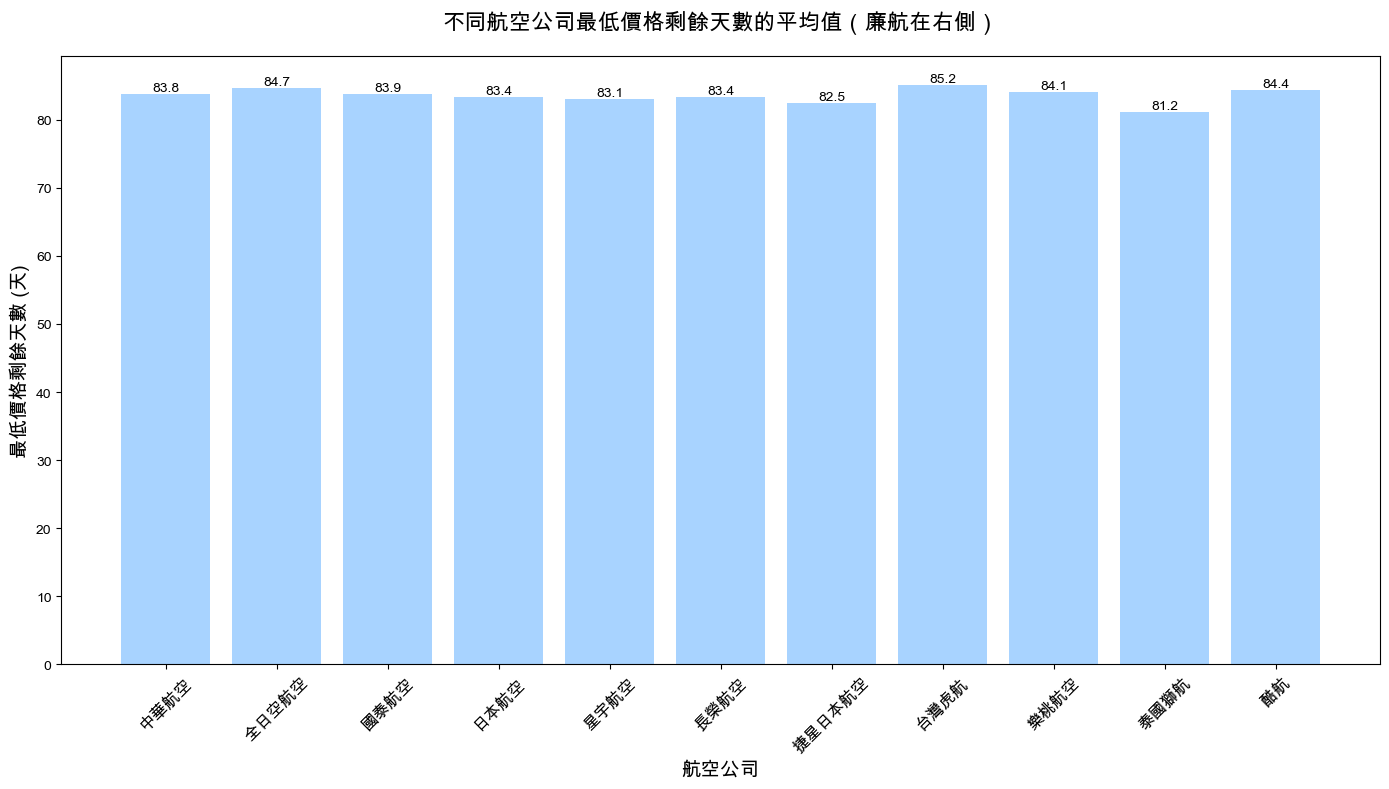

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 讀取清理後的資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 定義廉航
low_cost_airlines = ['捷星日本航空', '台灣虎航', '樂桃航空', '泰國獅航', '酷航']

# 按航空公司排序，將廉航排到右側
sorted_airlines = sorted([airline for airline in df['航空公司'].unique() if airline not in low_cost_airlines])
sorted_airlines += low_cost_airlines

# 計算平均最低價格剩餘天數，並按照排序重新組織數據
average_days = df.groupby('航空公司')['最低價格剩餘天數'].mean().reindex(sorted_airlines)

# 繪製條形圖
plt.figure(figsize=(14, 8))
bars = plt.bar(average_days.index, average_days.values, color='#99CCFF', alpha=0.85)

# 添加數值標籤
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

# 美化圖表
plt.title('不同航空公司最低價格剩餘天數的平均值（廉航在右側）', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('航空公司', fontsize=14)
plt.ylabel('最低價格剩餘天數 (天)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

**不同航空公司價格趨勢**

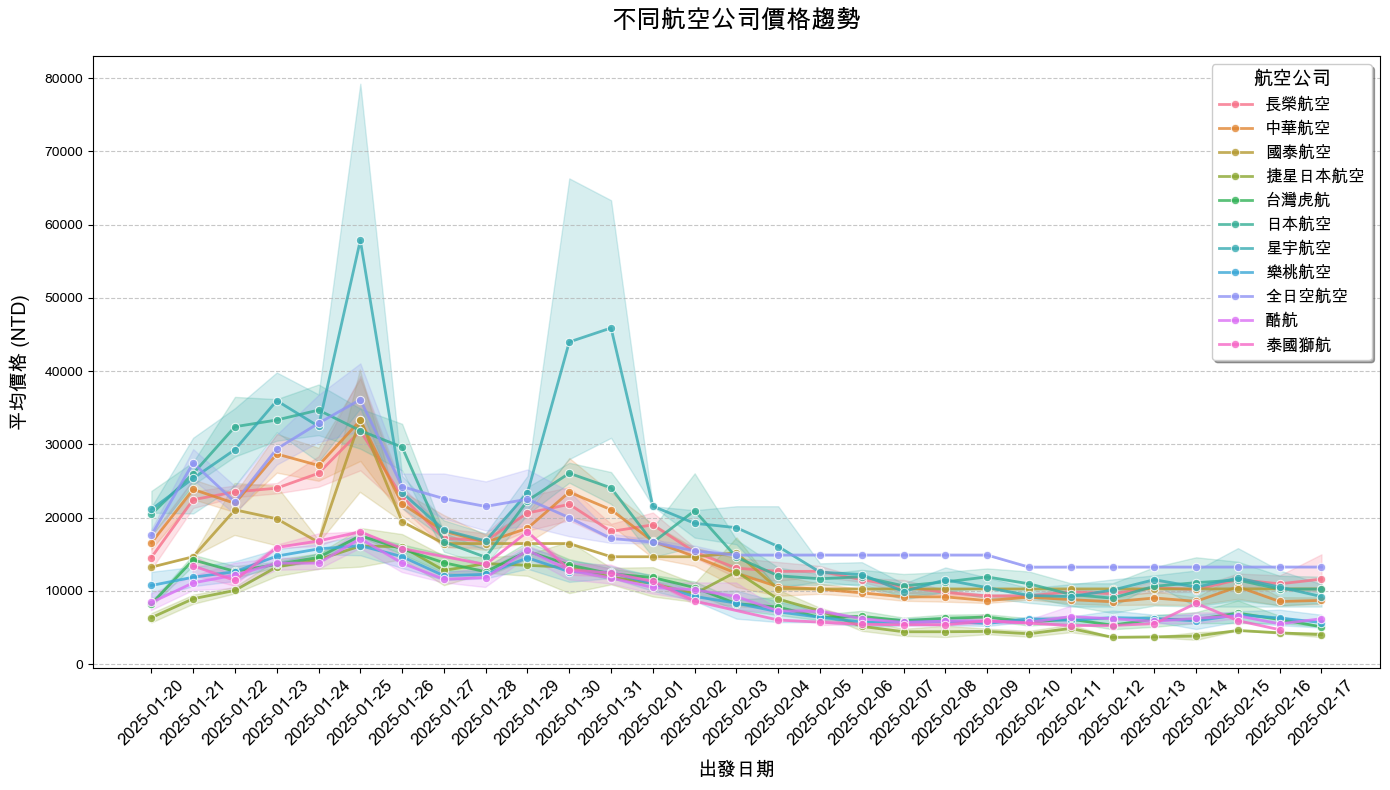

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製折線圖
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='出發日期', y='平均價格', hue='航空公司', marker='o', linewidth=2, alpha=0.8)

# 設置標題和軸標籤
plt.title('不同航空公司價格趨勢', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('出發日期', fontsize=14, labelpad=10)
plt.ylabel('平均價格 (NTD)', fontsize=14, labelpad=10)

# 調整 x 軸標籤格式
plt.xticks(rotation=45, fontsize=12)

# 美化圖例
plt.legend(title='航空公司', fontsize=12, title_fontsize=14, loc='upper right', frameon=True, fancybox=True, shadow=True)

# 添加網格線
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司最低價格趨勢**

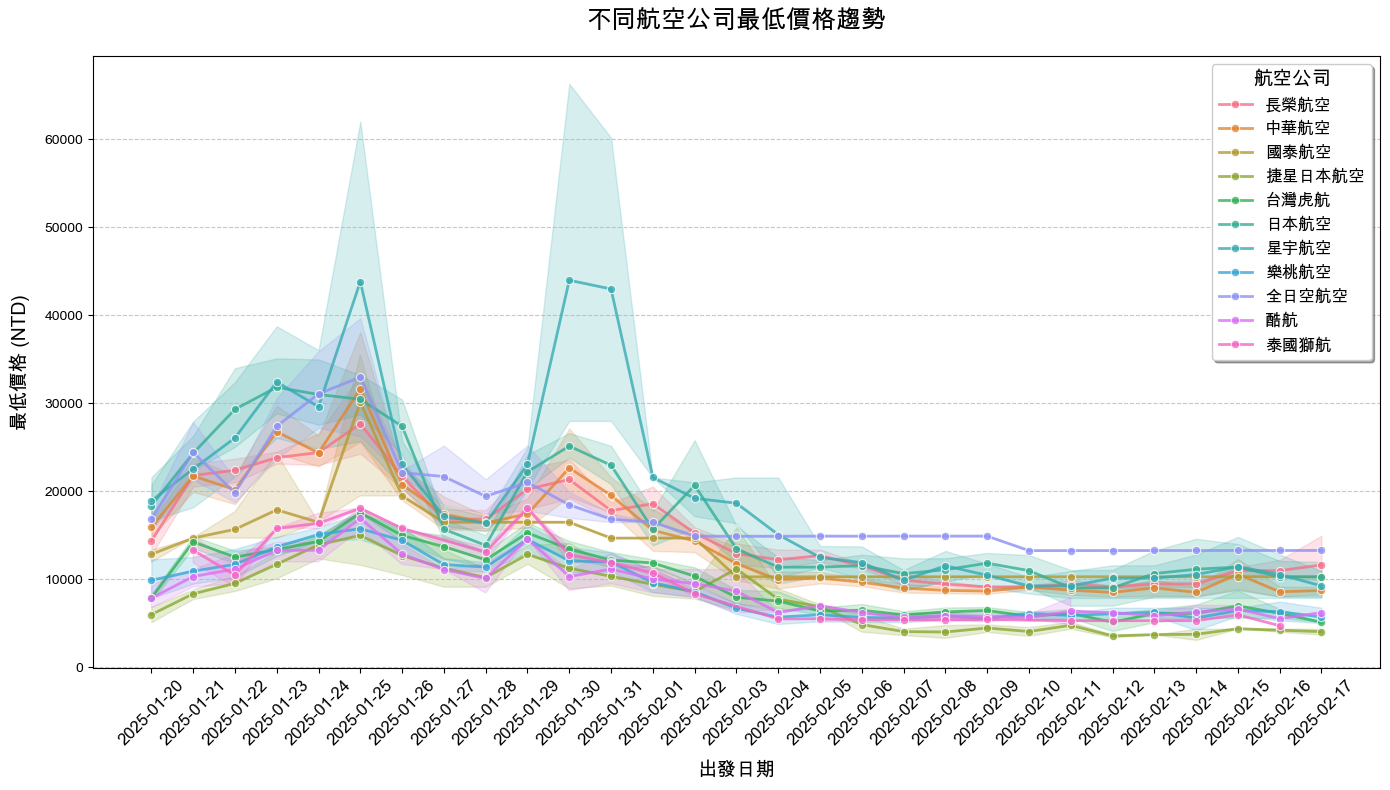

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製折線圖
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='出發日期', y='最低價格', hue='航空公司', marker='o', linewidth=2, alpha=0.8)

# 設置標題和軸標籤
plt.title('不同航空公司最低價格趨勢', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('出發日期', fontsize=14, labelpad=10)
plt.ylabel('最低價格 (NTD)', fontsize=14, labelpad=10)

# 調整 x 軸標籤格式
plt.xticks(rotation=45, fontsize=12)

# 美化圖例
plt.legend(title='航空公司', fontsize=12, title_fontsize=14, loc='upper right', frameon=True, fancybox=True, shadow=True)

# 添加網格線
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 自動調整布局
plt.tight_layout()

# 顯示圖表
plt.show()

**不同航空公司航班數量比例**

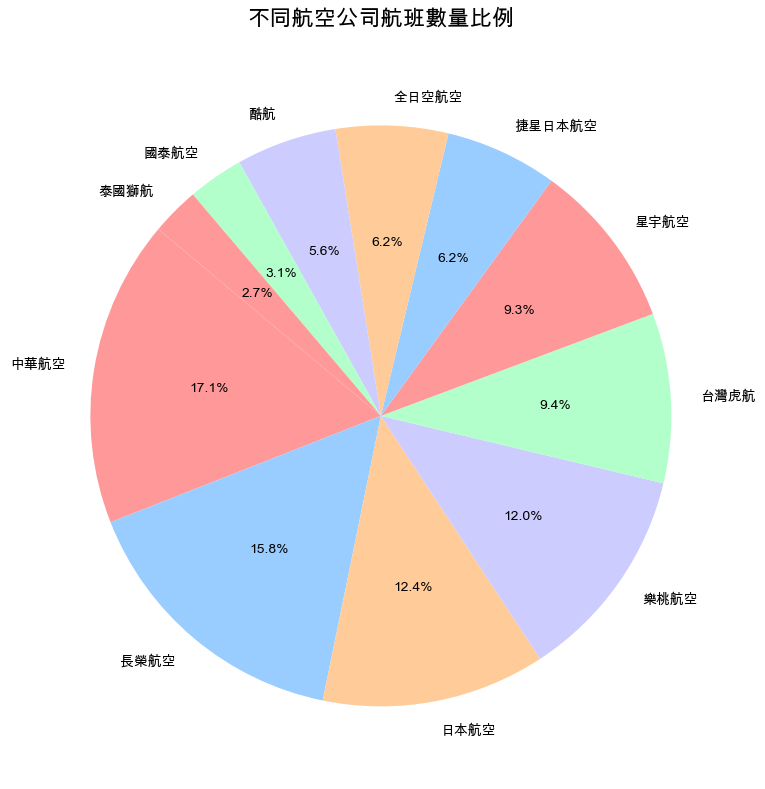

In [88]:
# 計算航班數量
flight_counts = df['航空公司'].value_counts()

# 繪製圓餅圖
plt.figure(figsize=(10, 8))
plt.pie(flight_counts, labels=flight_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('不同航空公司航班數量比例', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()